### Loading and prerequesites

In [11]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
VARIANT = "LARGE" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_full.pkl")

### Dictionary qual_mediaframes

In [13]:
# Create an empty dictionary
qual_mediaframes = {}

# Read the CSV file
with open("../Data/Dictionaries/qual_mediaframes.csv", "r") as f:
    # Skip the header line
    next(f)
    
    # Iterate over each line in the CSV
    for line in f:
        # Split the line by the delimiter
        columns = line.strip().split(";")
        
        # Extract the key and value
        key = columns[1]
        value = columns[0]

        # Replace whitespaces in the key with underscores
        key = key.replace(" ", "_")
        
        # Check if the key already exists in the dictionary
        if key in qual_mediaframes:
            # Append the value to the existing list
            qual_mediaframes[key].append(value)
        else:
            # Create a new list with the value
            qual_mediaframes[key] = [value]

In [14]:
print(qual_mediaframes)

{'future_orientation': ['künftige generationen', 'zukünftige herausforderungen', 'zukunft', 'ernähren', 'weltbevölkerung', 'klimaschutz', 'fridays for future', 'klimawechsel', 'treibhauseffekt', 'globale erwärmung', 'hitze', 'erwärmung', 'hunger', 'dürre', 'rodung', 'urwaldzerstörung', 'mangelernährung', 'klima', 'klimabedingungen', 'klimawandel', 'massentierhaltung'], 'globalized_economy': ['großkonzerne', 'gewinnorientierung', 'kapitalismus', 'globalisierung', 'profitmaximierung', 'monopolisierung', 'marktmacht', 'aktienkurs', 'börse', 'marktdominanz', 'saatguthersteller', 'weltmarkt'], 'environmental_issues': ['fleischerzeugung', 'fleischproduktion', 'massentierhaltung', 'flesichkonsum', 'sojabohnen', 'glyphosat', 'pflanzenschutzmittel', 'herbizide', 'bananen'], 'methodological_revolution': ['neubewertung', 'umdenken', 'trendwende', 'forschung', 'genschere', 'crispr', 'nobelpreis', 'biotechnologie', 'exakt', 'präzise', 'wissenschaft'], 'political_responsibility': ['europäische kommi

In [15]:
# Add a column in df for each key in the dictionary
for key in qual_mediaframes.keys():
    key = key.replace(" ", "_")
    df[key] = 0

# Load the German language model in Spacy
nlp = spacy.load('de_core_news_sm')

# Iterate over each row in the dataframe and count the number of times each key appears
for i, row in df.iterrows():
    # Get the text
    text = row["text"]
    
    # Create a spacy doc
    doc = nlp(text)
    
    # Iterate over each key in the dictionary
    for key in qual_mediaframes.keys():
        # Iterate over each value in the list
        for value in qual_mediaframes[key]:
            # Check if the value is in the doc
            if value in doc.text:
                # Increment the counter
                df.loc[i, key] += 1

In [16]:
df.head()

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,future_orientation,globalized_economy,environmental_issues,methodological_revolution,political_responsibility,individual_concerns,preserving_tradition,negative_mobilisation
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,0,0,0,0,3,0,0,0
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,0,0,0,0,2,0,1,0
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,0,0,0,0,1,0,0,0
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,0,0,0,0,0,0,0,0
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,0,0,0,0,0,0,1,0


In [17]:
# Create a new dataframe to store the aggregated data
yearly_data = pd.DataFrame()

# Group the dataframe by year and calculate the article count and word count
yearly_data['article_count'] = df.groupby('publication_year')['text'].count()
yearly_data['word_count'] = df.groupby('publication_year')['word_count'].sum()

# Rename the column publication_year to year
yearly_data.index.names = ['year']

# Group the dataframe by year and calculate the count for each key
for key in qual_mediaframes.keys():
    yearly_data[key] = df.groupby('publication_year')[key].sum()

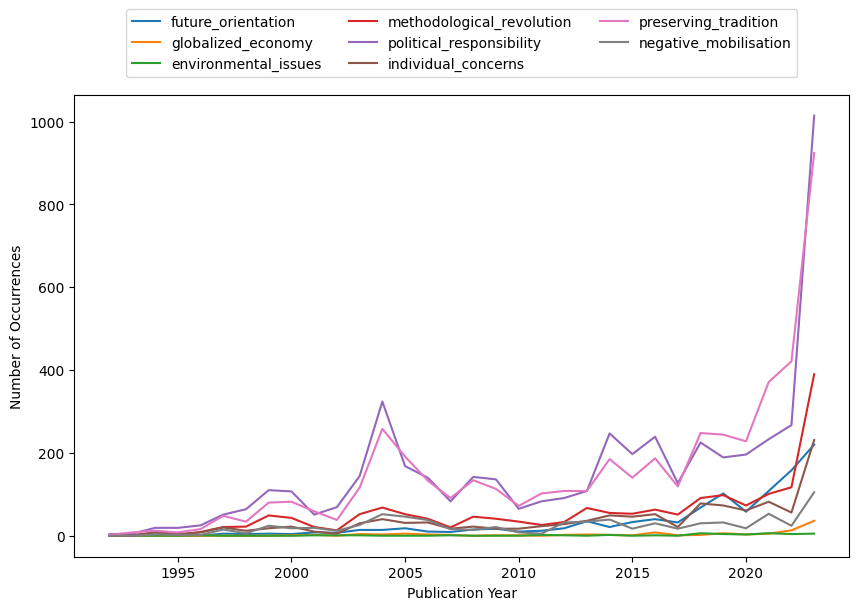

In [18]:
# Create a list of keys to plot
keys_to_plot = list(qual_mediaframes.keys())

# Create a new dataframe with only the columns of interest
plot_data = yearly_data[keys_to_plot]

# Plot the data
plot_data.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.savefig('../Visuals/qual_mediaframes_total.png')
plt.show()

In [54]:
# Create a copy of df
df_bool = df.copy()

# Add new columns to the dataframe df_copy for each key that is True if the key is in the article more than once and False if the key is not in the article
for key in qual_mediaframes.keys():
    df_bool[key] = df_bool[key].apply(lambda x: True if x > 0 else False)

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,future_orientation,globalized_economy,environmental_issues,methodological_revolution,political_responsibility,individual_concerns,preserving_tradition,negative_mobilisation
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,False,False,False,False,True,False,False,False
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,False,False,False,False,True,False,True,False
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,False,False,False,False,True,False,False,False
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,False,False,False,False,False,False,False,False
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5280,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,6 an anfang drei frage 1 können wir anderer mi...,305,False,False,False,False,True,False,False,False
5281,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",ein saftig filet für der kein huhn sterben mus...,266,False,False,False,False,False,False,False,False
5282,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,john dickie delizia der italiener und ihr kü...,912,False,False,False,True,True,False,True,False
5283,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,es sein der letzter tag auf der lebensmittelme...,2548,True,False,False,True,True,True,True,False


In [61]:
# Create a new dataframe to store the aggregated data
yearly_data_bool = pd.DataFrame()

# Group the dataframe by year and calculate the article count and word count
yearly_data_bool['article_count'] = df_bool.groupby('publication_year')['text'].count()
yearly_data_bool['word_count'] = df_bool.groupby('publication_year')['word_count'].sum()

# Rename the column publication_year to year
yearly_data_bool.index.names = ['year']

# Group the dataframe by year and calculate the count for each key
for key in qual_mediaframes.keys():
    yearly_data_bool[key] = df_bool.groupby('publication_year')[key].sum()

plot_data_percentage = yearly_data_bool[keys_to_plot]

In [62]:
# Add a new column to the dataframe plot_data called 'publication_count' with the value of the column 'article_count' of the dataframe yearly_data_bool using loc
plot_data_percentage['publication_count'] = yearly_data_bool.loc[:, 'article_count']

# Add new columns to the dataframe plot_data for each key
for key in qual_mediaframes.keys():
    plot_data_percentage[key + '_percentage'] = plot_data_percentage[key] / plot_data_percentage['publication_count']

# Remove the columns for the keys
plot_data_percentage = plot_data_percentage.drop(columns=keys_to_plot)

# Remove the column 'publication_count'
plot_data_percentage = plot_data_percentage.drop(columns=['publication_count'])

C:\Users\Kai\AppData\Local\Temp\ipykernel_14492\3303098044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_percentage['publication_count'] = yearly_data_bool.loc[:, 'article_count']


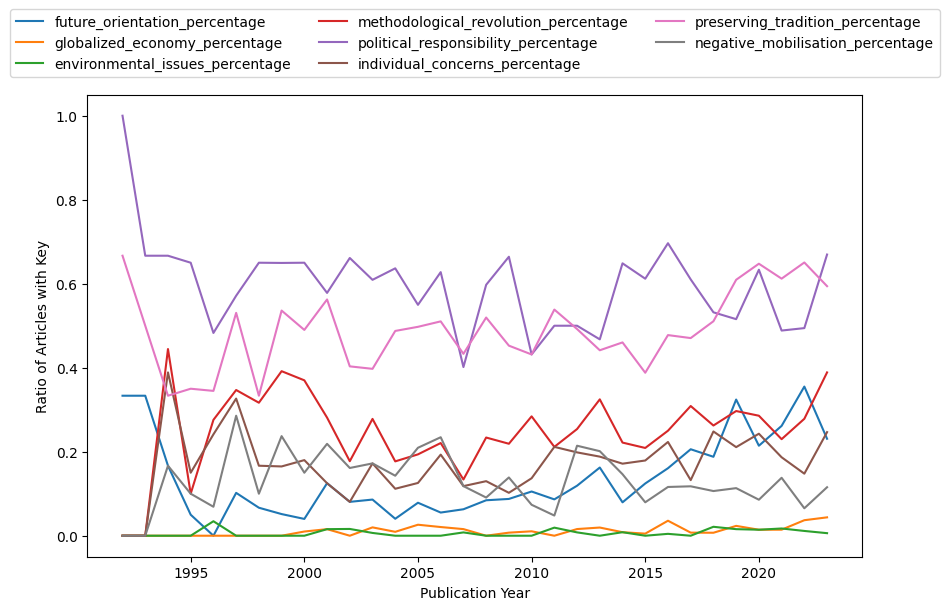

In [66]:
# Plot the data
plot_data_percentage.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Key')
plt.savefig('../Visuals/qual_mediaframes_percentage.png')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.show()

In [67]:
# Copy the dataframe plot_data to a new dataframe plot_data_percentage_article
plot_data_percentage_article = plot_data.copy()

# Add a new column to the dataframe plot_data called 'publication_count' with the value of the column 'article_count' of the dataframe yearly_data using loc
plot_data_percentage_article['publication_count'] = yearly_data.loc[:, 'article_count']

# Add new columns to the dataframe plot_data for each key
for key in qual_mediaframes.keys():
    plot_data_percentage_article[key + '_percentage'] = plot_data_percentage_article[key] / plot_data_percentage_article['publication_count']

# Remove the columns for the keys
plot_data_percentage_article = plot_data_percentage_article.drop(columns=keys_to_plot)

# Remove the column 'publication_count'
plot_data_percentage_article = plot_data_percentage_article.drop(columns=['publication_count'])

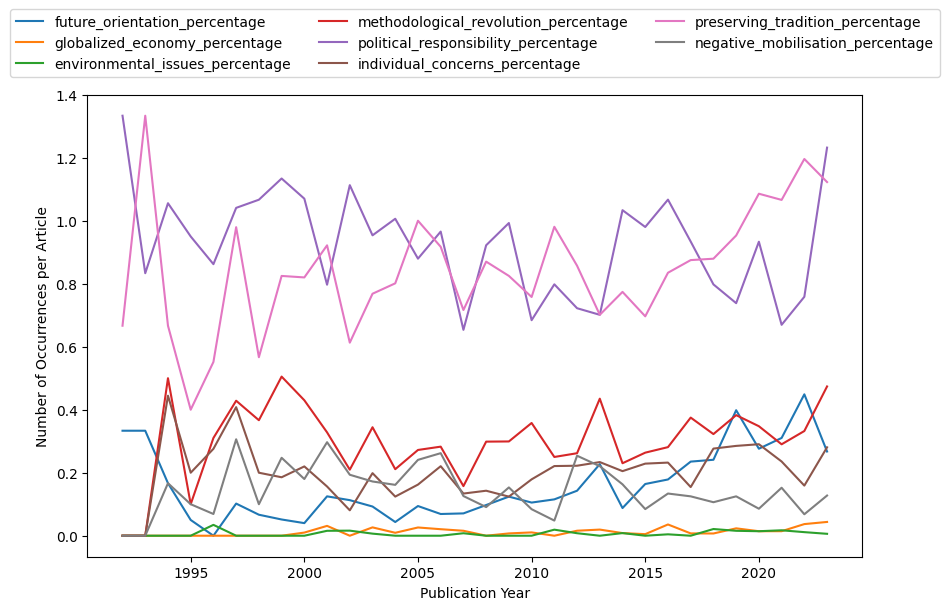

In [68]:
# Plot the data
plot_data_percentage_article.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences per Article')
plt.savefig('../Visuals/qual_mediaframes_per_article.png')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.show()

In [69]:
# Copy the dataframe plot_data to a new dataframe plot_data_percentage_word
plot_data_percentage_word = plot_data.copy()

# Add a new column to the dataframe plot_data called 'word_count' with the value of the column 'word_count' of the dataframe yearly_data using loc
plot_data_percentage_word['word_count'] = yearly_data.loc[:, 'word_count']

# Add new columns to the dataframe plot_data for each key
for key in qual_mediaframes.keys():
    plot_data_percentage_word[key + '_percentage'] = plot_data_percentage_word[key] / plot_data_percentage_word['word_count']

# Remove the columns for the keys
plot_data_percentage_word = plot_data_percentage_word.drop(columns=keys_to_plot)

# Remove the column 'publication_count'
plot_data_percentage_word = plot_data_percentage_word.drop(columns=['word_count'])

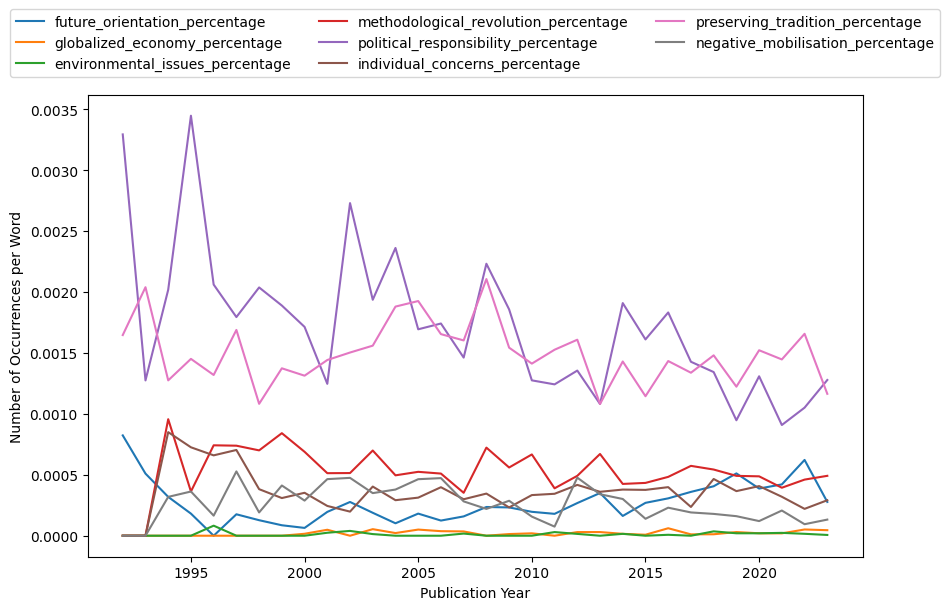

In [70]:
# Plot the data
plot_data_percentage_word.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences per Word')
plt.savefig('../Visuals/qual_mediaframes_per_word.png')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.show()